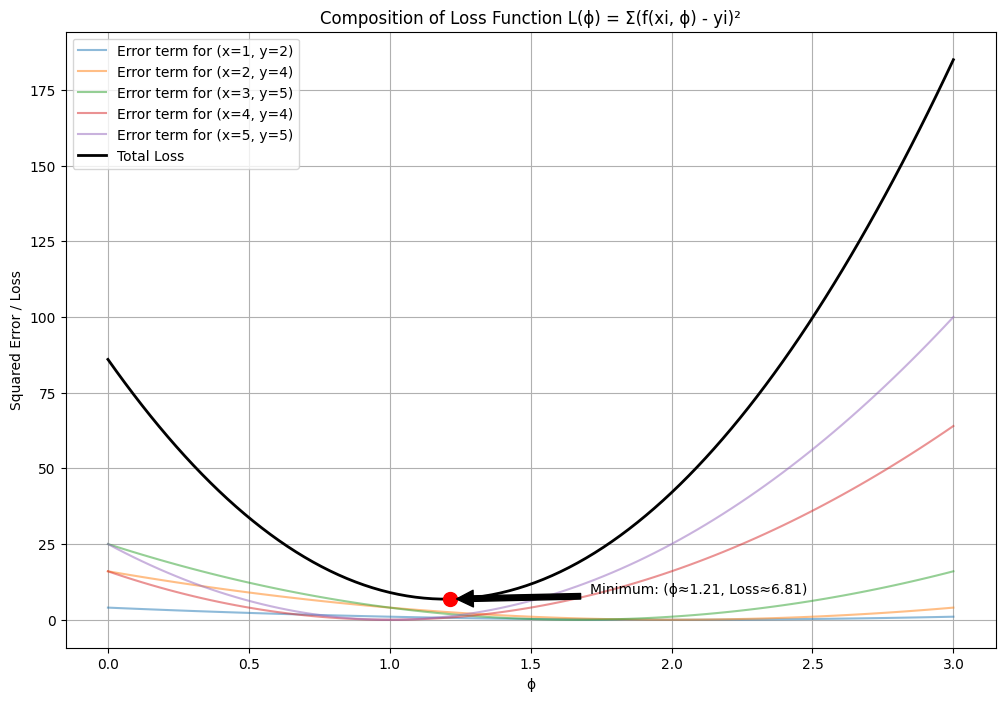

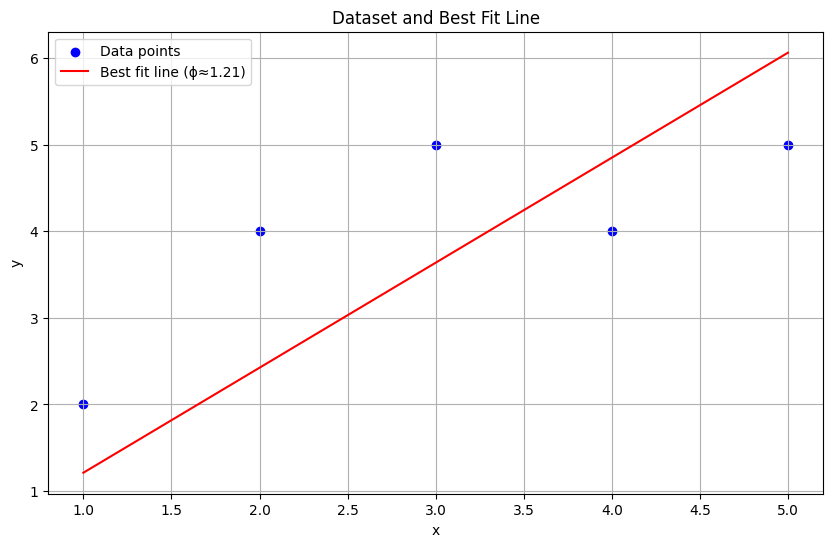

The optimal value of ϕ is approximately 1.21


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a fixed dataset
np.random.seed(42)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Define the model and loss function
def model(x, phi):
    return phi * x

def squared_error(x, y, phi):
    return (model(x, phi) - y)**2

def total_loss(x, y, phi):
    return np.sum(squared_error(x, y, phi))

# Create a range of phi values
phi_range = np.linspace(0, 3, 100)

# Calculate individual squared errors and total loss
individual_errors = np.array([squared_error(x, y, phi) for phi in phi_range])
total_losses = np.sum(individual_errors, axis=1)

# Plotting
plt.figure(figsize=(12, 8))

# Plot individual squared error terms
for i in range(len(x)):
    plt.plot(phi_range, individual_errors[:, i], 
             label=f'Error term for (x={x[i]}, y={y[i]})', 
             alpha=0.5)

# Plot the total loss function
plt.plot(phi_range, total_losses, 'k-', linewidth=2, label='Total Loss')

# Find and mark the minimum of the total loss
min_phi = phi_range[np.argmin(total_losses)]
min_loss = np.min(total_losses)
plt.plot(min_phi, min_loss, 'ro', markersize=10)
plt.annotate(f'Minimum: (ϕ≈{min_phi:.2f}, Loss≈{min_loss:.2f})',
             xy=(min_phi, min_loss), xytext=(min_phi + 0.5, min_loss + 2),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlabel('ϕ')
plt.ylabel('Squared Error / Loss')
plt.title('Composition of Loss Function L(ϕ) = Σ(f(xi, ϕ) - yi)²')
plt.legend()
plt.grid(True)

plt.show()

# Plot the data points and the best fit line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, model(x, min_phi), color='red', label=f'Best fit line (ϕ≈{min_phi:.2f})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset and Best Fit Line')
plt.legend()
plt.grid(True)
plt.show()

print(f"The optimal value of ϕ is approximately {min_phi:.2f}")

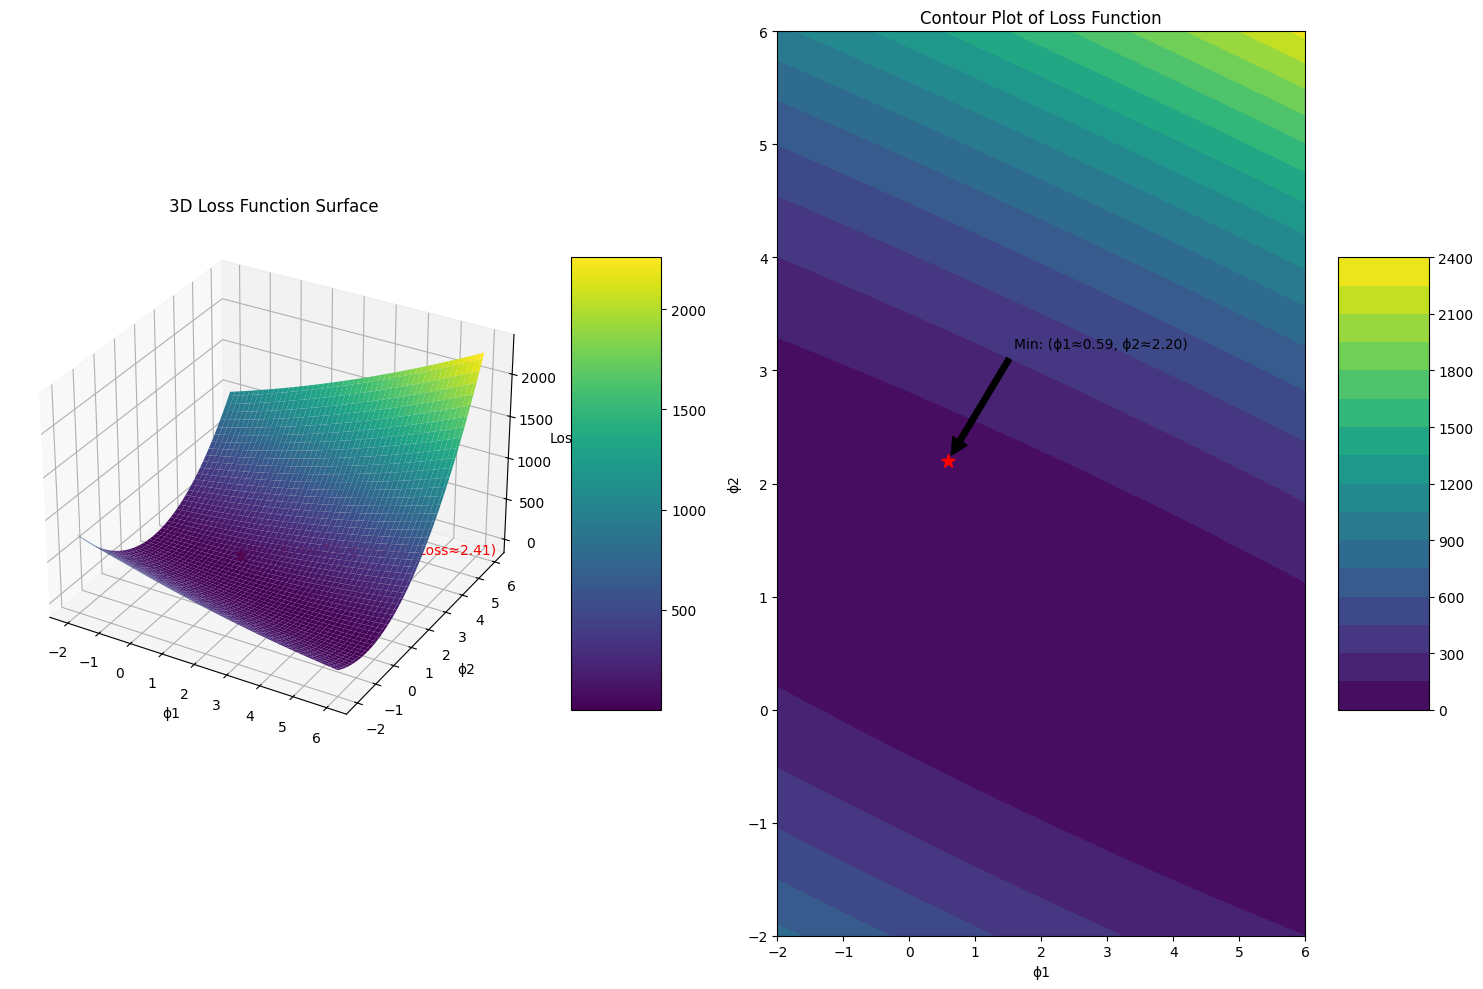

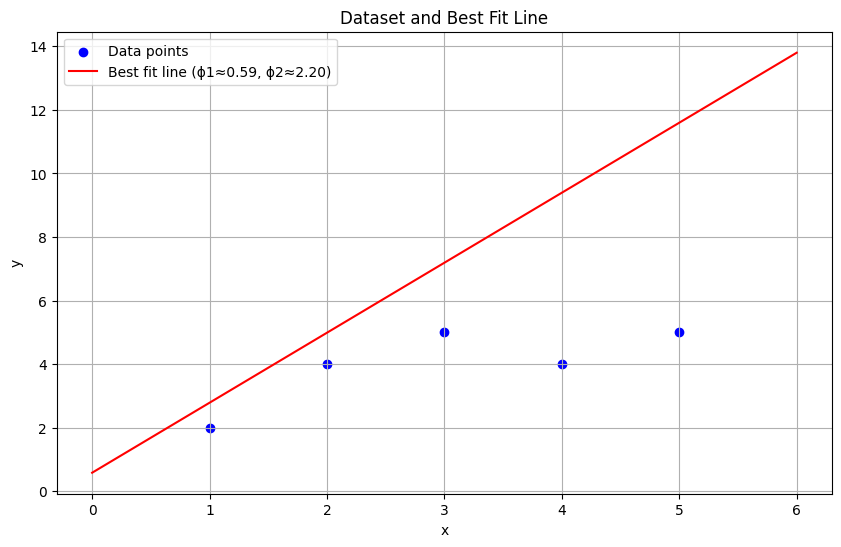

The optimal value of ϕ1 (intercept) is approximately 0.59
The optimal value of ϕ2 (slope) is approximately 2.20


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate a fixed dataset
np.random.seed(42)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Define the model and loss function
def model(x, phi1, phi2):
    return phi1 + phi2 * x

def squared_error(x, y, phi1, phi2):
    return (model(x, phi1, phi2) - y)**2

def total_loss(x, y, phi1, phi2):
    return np.sum(squared_error(x, y, phi1, phi2))

# Create a grid of phi1 and phi2 values
phi1_range = np.linspace(-2, 6, 100)
phi2_range = np.linspace(-2, 6, 100)
phi1_grid, phi2_grid = np.meshgrid(phi1_range, phi2_range)

# Calculate total loss for each combination of phi1 and phi2
loss_surface = np.vectorize(lambda p1, p2: total_loss(x, y, p1, p2))(phi1_grid, phi2_grid)

# Plotting
fig = plt.figure(figsize=(15, 10))

# 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(phi1_grid, phi2_grid, loss_surface, cmap='viridis')
ax1.set_xlabel('ϕ1')
ax1.set_ylabel('ϕ2')
ax1.set_zlabel('Loss')
ax1.set_title('3D Loss Function Surface')
fig.colorbar(surf, shrink=0.5, aspect=5)

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(phi1_grid, phi2_grid, loss_surface, levels=20, cmap='viridis')
ax2.set_xlabel('ϕ1')
ax2.set_ylabel('ϕ2')
ax2.set_title('Contour Plot of Loss Function')
fig.colorbar(contour, shrink=0.5, aspect=5)

# Find and mark the minimum
min_idx = np.unravel_index(np.argmin(loss_surface), loss_surface.shape)
min_phi1, min_phi2 = phi1_range[min_idx[0]], phi2_range[min_idx[1]]
min_loss = loss_surface[min_idx]

ax1.scatter(min_phi1, min_phi2, min_loss, color='red', s=100, marker='*')
ax1.text(min_phi1, min_phi2, min_loss, f'Min: (ϕ1≈{min_phi1:.2f}, ϕ2≈{min_phi2:.2f}, Loss≈{min_loss:.2f})', 
         color='red')

ax2.scatter(min_phi1, min_phi2, color='red', s=100, marker='*')
ax2.annotate(f'Min: (ϕ1≈{min_phi1:.2f}, ϕ2≈{min_phi2:.2f})',
             xy=(min_phi1, min_phi2), xytext=(min_phi1 + 1, min_phi2 + 1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()

# Plot the data points and the best fit line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
x_line = np.linspace(0, 6, 100)
plt.plot(x_line, model(x_line, min_phi1, min_phi2), color='red', 
         label=f'Best fit line (ϕ1≈{min_phi1:.2f}, ϕ2≈{min_phi2:.2f})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset and Best Fit Line')
plt.legend()
plt.grid(True)
plt.show()

print(f"The optimal value of ϕ1 (intercept) is approximately {min_phi1:.2f}")
print(f"The optimal value of ϕ2 (slope) is approximately {min_phi2:.2f}")